# Jupyter Notebook Support

Jupyter notebooks can be rendered as part of the documentation build system as an alternative to markdown files. The 
docs site uses [mkdocs-jupyter](https://mkdocs-jupyter.danielfrg.com/) to build and render jupyter notebooks as markdown
files.

*Note*: There are some limitations to jupyter rendering.
1. Notebooks are not executed as part of the docs publishing pipeline. CI tests to ensure notebook consistency are run
   separately (see [Testing Jupyter Notebooks](#testing-jupyter-notebooks)).
2. Notebook markdown cells don't support the full range of mkdocs-material configuration, including things like
   admonitions, referencing automatically-generated API documentation via mkdocstrings etc. (more
   [here](https://github.com/squidfunk/mkdocs-material/discussions/4461)).

## Example code block

Markdown headings can be used to create a TOC similarly to traditional mkdocs pages.

In [1]:
a = 1
b = 2
a + b

3

## Embedded visualizations

We can also embed images using standard approaches to embedding graphics in notebooks.

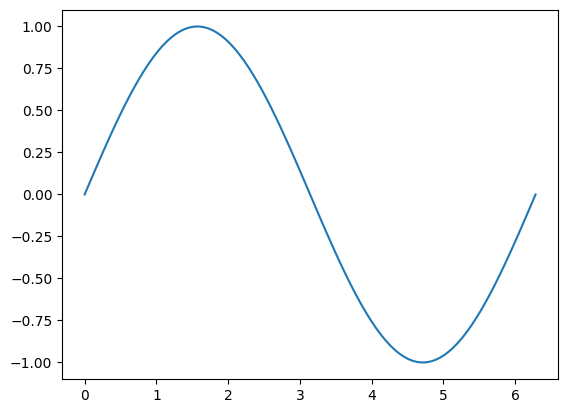

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(0, 2*np.pi, 100)
plt.plot(xs, np.sin(xs))

## Testing Jupyter Notebooks

Jupyter notebooks are run as part of the CI build suite using
[`nbval`](https://github.com/computationalmodelling/nbval/tree/master). To run these tests locally, run

```bash
pytest --nbval-lax docs/
```

from the repository root. By default, `nbval` will only check that the notebook executes successfully. To add additional
checks to ensure the consistency of the output, add a `#NBVAL_CHECK_OUTPUT` marker comment, which will ensure that the
output of the saved jupyter notebook matches the output when the notebook is executed in CI.

For example:

In [3]:
#NBVAL_CHECK_OUTPUT
# pragma: allowlist secret

import torch
print(torch.__version__)

2.3.0a0+ebedce2
